<a href="https://colab.research.google.com/github/Satyake/Time-Series-Analysis-spagheti-code/blob/master/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df=pd.read_csv('/content/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [4]:
df['date']=pd.to_datetime({'year':df['year'],'month':df['month'],'day':1})

In [5]:
df=df.set_index('date')

In [6]:
df.head()
df.index.freq='MS'

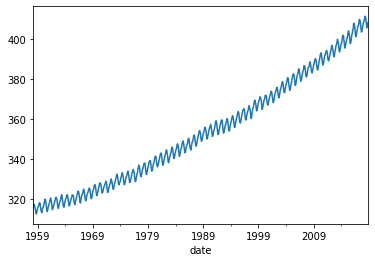

In [7]:
df['interpolated'].plot()

In [8]:
import matplotlib.pyplot as plt


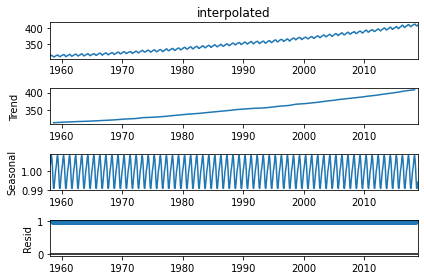

In [9]:
result=seasonal_decompose(df['interpolated'],model='mul')
result.plot();

In [ ]:
result.se

In [ ]:
!pip install pmdarima

In [12]:
from pmdarima import auto_arima,plot_acf

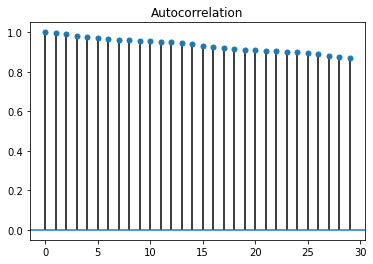

In [13]:
plot_acf(df['interpolated'])

In [17]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.252
Date:                            Thu, 12 Nov 2020   AIC                            424.505
Time:                                    19:20:52   BIC                            452.046
Sample:                                         0   HQIC                           435.132
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3510      0.083      4.212      0.000       0.188       0.514
ar.L2          0.0873      0.058      1.501      0.133      -0.027       0.201
ma.L1         -0.7060      0.088     -8.048      0.000      -0.878      -0.534
ar.S.L12       0.9996      0.000   2992.587      0.000       0.999       1.000
ma.S.L12      -0.8665      0.021    -40.618      0.000      -0.908      -0.825
sigma2         0.0956      0.005     20.438      0.000       0.086       0.105
===================================================================================
Ljung-Box (Q):                       43.76   Jarque-Bera (JB):                 4.47
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
model=SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [20]:
train=df.iloc[:717]
test=df.iloc[717:]

In [21]:
model=SARIMAX(train['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12))

In [26]:
fitted_model=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [40]:
start=len(train)
end=len(train)+len(test)-1
results=fitted_model.predict(start=start,end=end,typ='levels')

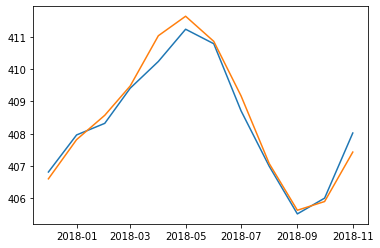

In [41]:
plt.plot(test['interpolated'])
plt.plot(results)

In [42]:
from statsmodels.tools.eval_measures import rmse

In [43]:
error=rmse(test['interpolated'],results)

In [44]:
error

0.35756143314487643